In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import manifold

In [2]:
df = pd.DataFrame(np.random.normal(size=(6, 6)), columns=[x for x in "ABCDEF"])
df

,A,B,C,D,E,F
0,-0.332581,-0.470672,0.194433,0.321925,0.554982,0.242369
1,0.538617,-0.542729,0.501124,1.393798,-0.437313,-0.905420
2,0.647384,0.794298,0.450652,-0.051892,1.234343,-0.290872
3,-1.112378,-2.448705,-0.427093,-0.756790,0.537366,0.823569
4,0.063843,0.598672,0.190479,-0.950185,-2.301760,1.569075
5,1.606959,1.119116,-0.341167,0.705317,-0.626882,0.219459


In [4]:
def neg_red(x):
    return f"color: {'red' if x < 0 else 'black'}"
df.style.applymap(neg_red)

,A,B,C,D,E,F
0,-0.332581,-0.470672,0.194433,0.321925,0.554982,0.242369
1,0.538617,-0.542729,0.501124,1.393798,-0.437313,-0.905420
2,0.647384,0.794298,0.450652,-0.051892,1.234343,-0.290872
3,-1.112378,-2.448705,-0.427093,-0.756790,0.537366,0.823569
4,0.063843,0.598672,0.190479,-0.950185,-2.301760,1.569075
5,1.606959,1.119116,-0.341167,0.705317,-0.626882,0.219459


In [7]:
def gold_max(xs):
    m = xs.to_numpy().max()
    color = {True: 'background-color: #c78f2c', False:""}
    is_max = (xs == m).replace(color)
    return is_max
df.style.apply(gold_max, axis=0)

,A,B,C,D,E,F
0,-0.332581,-0.470672,0.194433,0.321925,0.554982,0.242369
1,0.538617,-0.542729,0.501124,1.393798,-0.437313,-0.905420
2,0.647384,0.794298,0.450652,-0.051892,1.234343,-0.290872
3,-1.112378,-2.448705,-0.427093,-0.756790,0.537366,0.823569
4,0.063843,0.598672,0.190479,-0.950185,-2.301760,1.569075
5,1.606959,1.119116,-0.341167,0.705317,-0.626882,0.219459


In [8]:
df.style.background_gradient(cmap='magma')

,A,B,C,D,E,F
0,-0.332581,-0.470672,0.194433,0.321925,0.554982,0.242369
1,0.538617,-0.542729,0.501124,1.393798,-0.437313,-0.905420
2,0.647384,0.794298,0.450652,-0.051892,1.234343,-0.290872
3,-1.112378,-2.448705,-0.427093,-0.756790,0.537366,0.823569
4,0.063843,0.598672,0.190479,-0.950185,-2.301760,1.569075
5,1.606959,1.119116,-0.341167,0.705317,-0.626882,0.219459


In [10]:
df.abs().style.bar(align="left", width=90)

,A,B,C,D,E,F
0,0.332581,0.470672,0.194433,0.321925,0.554982,0.242369
1,0.538617,0.542729,0.501124,1.393798,0.437313,0.905420
2,0.647384,0.794298,0.450652,0.051892,1.234343,0.290872
3,1.112378,2.448705,0.427093,0.756790,0.537366,0.823569
4,0.063843,0.598672,0.190479,0.950185,2.301760,1.569075
5,1.606959,1.119116,0.341167,0.705317,0.626882,0.219459


In [12]:
head = {'selector': 'th', 'props':[('text-align', 'center')]}
df.style.set_table_styles([head]).bar(align='mid', color=['red', 'green'], vmin=-3, vmax=3)

,A,B,C,D,E,F
0,-0.332581,-0.470672,0.194433,0.321925,0.554982,0.242369
1,0.538617,-0.542729,0.501124,1.393798,-0.437313,-0.905420
2,0.647384,0.794298,0.450652,-0.051892,1.234343,-0.290872
3,-1.112378,-2.448705,-0.427093,-0.756790,0.537366,0.823569
4,0.063843,0.598672,0.190479,-0.950185,-2.301760,1.569075
5,1.606959,1.119116,-0.341167,0.705317,-0.626882,0.219459


In [15]:
df.style.bar(align='mid', width=50).apply(gold_max, axis=None).applymap(neg_red)

,A,B,C,D,E,F
0,-0.332581,-0.470672,0.194433,0.321925,0.554982,0.242369
1,0.538617,-0.542729,0.501124,1.393798,-0.437313,-0.905420
2,0.647384,0.794298,0.450652,-0.051892,1.234343,-0.290872
3,-1.112378,-2.448705,-0.427093,-0.756790,0.537366,0.823569
4,0.063843,0.598672,0.190479,-0.950185,-2.301760,1.569075
5,1.606959,1.119116,-0.341167,0.705317,-0.626882,0.219459


# Scatter Matrix

In [21]:
df = pd.read_csv('heart.csv')
# target = df['target'].to_numpy()
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach']]
df.head()

,age,sex,cp,trestbps,chol,thalach
0,69,1,0,160,234,131
1,69,0,0,140,239,151
2,66,0,0,150,226,114
3,65,1,0,138,282,174
4,64,1,0,110,211,144


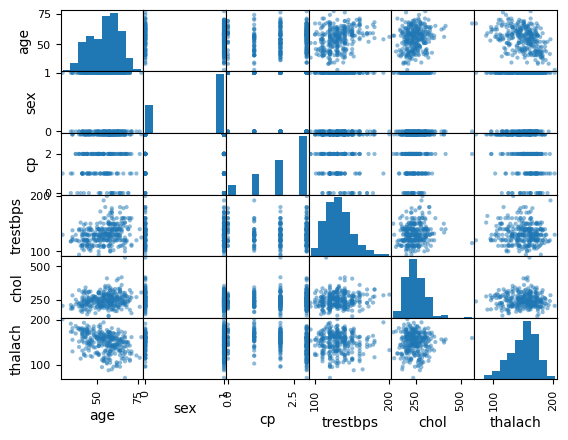

In [23]:
pd.plotting.scatter_matrix(df);

# Correlation Matrix

In [24]:
df.corr()

,age,sex,cp,trestbps,chol,thalach
age,1.000000,-0.092399,0.110471,0.290476,0.202644,-0.394563
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,-0.060496
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.339308
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,-0.049108
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,-0.000075
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,1.000000


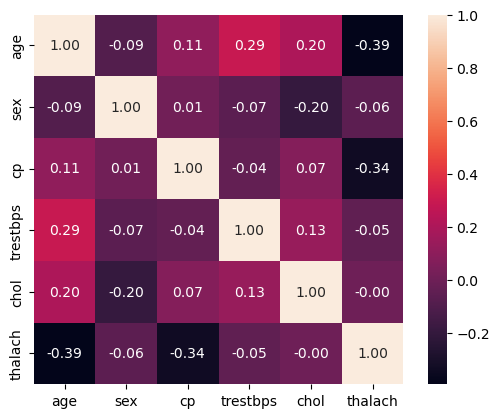

In [30]:
ax = sb.heatmap(df.corr(), annot=True, fmt="0.2f", square=True)